# Predicting Days Before Lapse for Marijuana Drug Abusers

In [90]:
import pandas as pd

def load_data(url):
    # read csv from github url
    # return pandas dataframe
    df = pd.read_csv(url)
    return df

url = 'https://raw.githubusercontent.com/prathikr/CS_499_Final_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv'
df = load_data(url)
display(df.head(5))
display(df.shape)

,ID,female,nonwhite,unemplmt,primsev,B2a_0,State,City,zipcode,noins,...,Any_Cens,Alcohol_Cens,Binge_Cens,Marijuana_Cens,Illicit_Cens,Any_Days,Alcohol_Days,Binge_Days,Marijuana_Days,Illicit_Days
0,9048,0,0,0,4,17,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,192,192,192,192,192
1,9152,0,0,0,1,18,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,176,176,176,176,176
2,9057,0,0,1,3,16,VA,Lynchburg,24501-1114,0,...,0,0,2,0,2,21,21,365,81,365
3,9139,0,0,0,3,16,VA,Lynchburg,24501-1114,0,...,0,2,0,0,2,20,365,0,20,365
4,9051,0,1,0,3,17,VA,Lynchburg,24501-1114,0,...,0,0,0,0,1,14,30,30,14,356


(26556, 110)

In [91]:
# ** Describe Data??

In [92]:
def trim_predictors(df, predictor_col_name, other_cols_to_drop):
    # extract nx1 vector for predictor and drop all other potential predictors
    # display(df.columns)
    print("Original df:", df.shape)
    Y = df[predictor_col_name]
    print("Predictor column:", Y.shape)
    df.drop(columns=[predictor_col_name], inplace=True)
    df.drop(columns=other_cols_to_drop, inplace=True)
    print("Post-extracting predictor column:", df.shape)
    # return extracted predictor values
    return Y

Y = trim_predictors(df, 'Marijuana_Days', ['State', 'City', 'zipcode', 'agyaddr', 'SFS8p_0', 'SFS8p_3', 'SFS8p_6', 
'SFS8p_12', 'ada_0','ada_3','ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6',
'S2b1_12','S2z1_3','S2z1_6','S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6',
'S2z4_12','S2z5_3','S2z5_6','S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens',
'Any_Days','Binge_Days','Alcohol_Days','Illicit_Days'])

Original df: (26556, 110)
Predictor column: (26556,)
Post-extracting predictor column: (26556, 65)


In [93]:
import numpy as np
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

def drop_NaN_columns(df):
    # replace all -999 with NaN inplace
    df.replace(to_replace = -999, value = np.nan, inplace = True)
    
    # calculate percentage of NaNs in each column
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    display_side_by_side(missing_value_df[0:23], missing_value_df[23:46], missing_value_df[46:69])
    
    # drop columns with > 25% inplace
    cols = []
    for index, row in missing_value_df.iterrows():
        if row['percent_missing'] > 25:
          cols.append(row['column_name'])
    df.drop(columns=cols, inplace=True)
    print("columns dropped:", cols)
    
drop_NaN_columns(df)

,column_name,percent_missing
ID,ID,0.000000
female,female,0.003766
nonwhite,nonwhite,0.030125
unemplmt,unemplmt,0.176984
primsev,primsev,0.015063
B2a_0,B2a_0,0.000000
noins,noins,57.327911
prsatx,prsatx,0.301250
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.276548


columns dropped: ['noins', 'E9e', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'POPIgrp', 'FIS4p_0']


In [94]:
def fill_NaN_columns(df):
    # replace NaNs with mean/mode inplace
    final_df = df.fillna(df.mean()).fillna(df.mode().iloc[0])
    percent_missing = final_df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': final_df.columns,'percent_missing': percent_missing})
    display_side_by_side(missing_value_df[0:23], missing_value_df[23:46], missing_value_df[46:69])
    return final_df

final_df = fill_NaN_columns(df)

,column_name,percent_missing
ID,ID,0.0
female,female,0.0
nonwhite,nonwhite,0.0
unemplmt,unemplmt,0.0
primsev,primsev,0.0
B2a_0,B2a_0,0.0
prsatx,prsatx,0.0
tottxp4,tottxp4,0.0
TRI_0,TRI_0,0.0
GVS,GVS,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121b2df98>]],
      dtype=object)

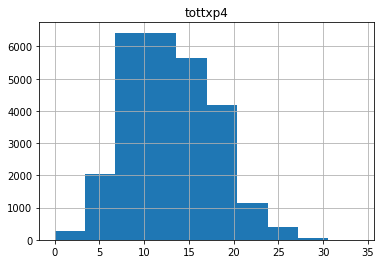

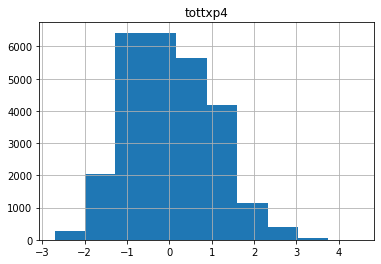

In [95]:
# normalize columns
from sklearn import preprocessing

cols = ['tottxp4', 'CWS_0', 'ADHDs_0', 'CDS_0', 'CJSI_0', 'EPS7p_0', 'LRI7_0', 'SRI7_0', 
          'ERS21_0', 'HIVrisk', 'totttld', 'S2x_0', 'SPSm_0', 'B2a_0']

df.hist('tottxp4')

scaler = preprocessing.StandardScaler()
for i in cols:
    df[i] = scaler.fit_transform(df[[i]])
    
df.hist('tottxp4')

In [96]:
from sklearn.model_selection import train_test_split

Xtr, Xte, Ytr, Yte = train_test_split(final_df, Y, test_size=0.25, random_state=17)
Xte_IDs = Xte[['ID']]
Xtr.drop(columns=['ID'], inplace=True)
Xte.drop(columns=['ID'], inplace=True)

print("Xtr:", Xtr.shape)
print("Ytr:", Ytr.shape)
print("Xte:", Xte.shape)
print("Yte:", Yte.shape)

Xtr: (19917, 55)
Ytr: (19917,)
Xte: (6639, 55)
Yte: (6639,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm = LinearRegression()
model = lm.fit(Xtr, Ytr)

coefficients = pd.DataFrame(model.coef_)
columns = pd.DataFrame(Xtr.columns)

display_side_by_side(coefficients[0:18], columns[0:18], coefficients[18:36], columns[18:36], coefficients[36:54], columns[36:54])

predictions = pd.DataFrame({'Marijuana_Days': model.predict(Xte)})
Yte = pd.DataFrame(Yte.dropna())

y_test = pd.concat([Xte_IDs, Yte], axis=1, sort=True).dropna()
y_pred = pd.concat([Xte_IDs, predictions], axis=1, sort=True).dropna()

y_test = y_test[:len(y_pred)]

print(y_pred.shape)
print(y_test.shape)

display_side_by_side(y_pred.head(), y_test.head())

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

,0
0,18.769720
1,0.325009
2,8.734601
3,-8.056240
4,2.689337
5,-7.123378
6,-1.158444
7,-5.913558
8,1.187462
9,4.848221


(1654, 2)
(1654, 2)


,ID,Marijuana_Days
1,9152.0,122.956188
6,12718.0,184.227328
9,12693.0,136.495827
12,12674.0,215.117068
13,12729.0,110.545932
,ID,Marijuana_Days
1,9152,176
6,12718,365
9,12693,358
12,12674,357


Mean Absolute Error: 58.6738409550285
